In [4]:
import pandas as pd

benin = pd.read_csv('data/benin-malanville_clean.csv')
sierraleone = pd.read_csv('data/sierraleone-bumbuna_clean.csv')
togo = pd.read_csv('data/togo-dapaong_qc_clean.csv')

# Add country column
benin['Country'] = 'Benin-malanville'
sierraleone['Country'] = 'Sierraeone-bumbuna'
togo['Country'] = 'Togo-dapaong_qc'

# Combine into one DataFrame
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

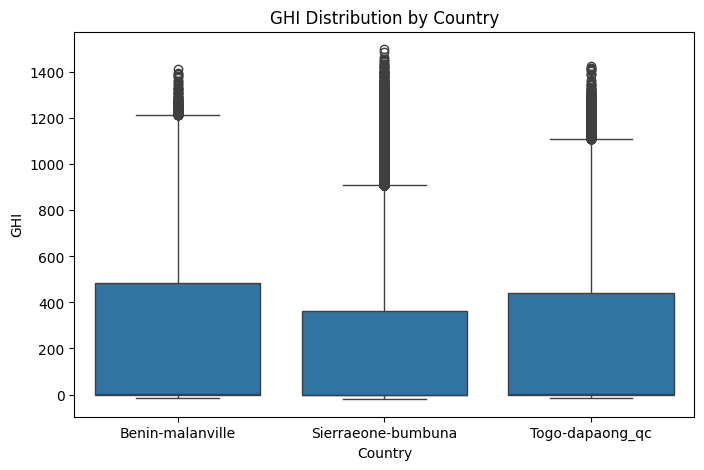

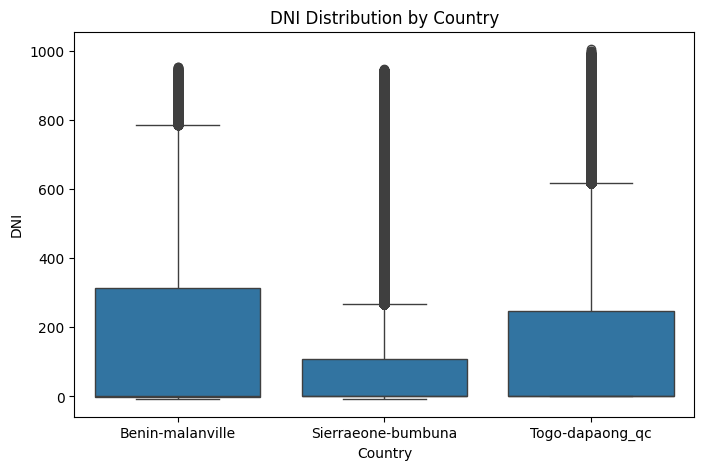

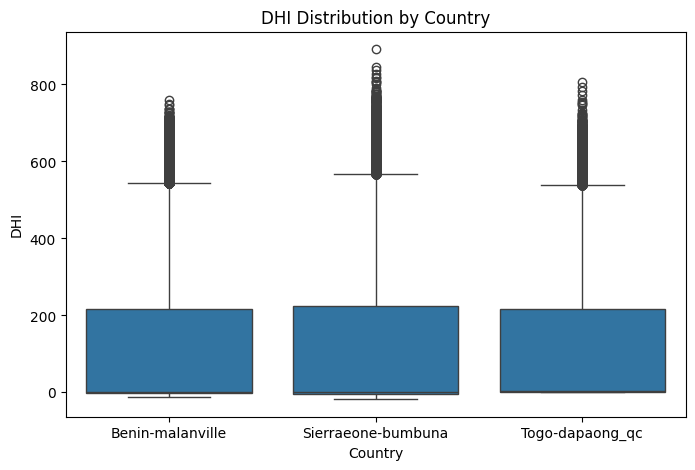

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution by Country')
    plt.show()


In [6]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.round(2)


GHI                    DNI                    DHI  \
                      mean median     std    mean median     std    mean   
Country                                                                    
Benin-malanville    240.56    1.8  331.13  167.19   -0.1  261.71  115.36   
Sierraeone-bumbuna  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   
Togo-dapaong_qc     230.56    2.1  322.53  151.26    0.0  250.96  116.44   

                                   
                   median     std  
Country                            
Benin-malanville      1.6  158.69  
Sierraeone-bumbuna   -0.1  158.95  
Togo-dapaong_qc       2.5  156.52

In [7]:
from scipy.stats import f_oneway, kruskal

# Example for GHI
ghi_groups = [benin['GHI'], sierraleone['GHI'], togo['GHI']]

# One-way ANOVA
anova_result = f_oneway(*ghi_groups)
print("ANOVA p-value:", anova_result.pvalue)

# Optional Kruskal–Wallis test (non-parametric)
kruskal_result = kruskal(*ghi_groups)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)


ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


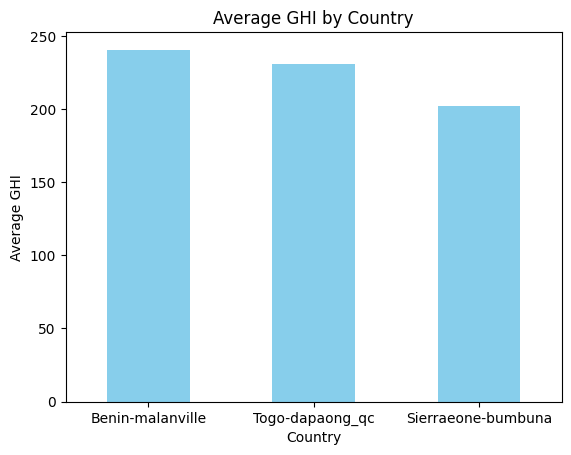

In [8]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.show()
